### CAPSTONE PROJECT PART 4: Picking the best model 
This notebook aims at showing me which model is the the best for my project.
In the previous notebooks I worked with the linear regression model. But I want to make sure that I am using the best model so that I can optimize the resulst.

In [26]:
from pycaret.regression import setup
from pycaret.regression import compare_models, create_model, tune_model, plot_model, interpret_model, predict_model
import pandas as pd

In [2]:
dataset = pd.read_csv('data/final_descriptors.csv')
dataset

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


### Model Setup

In [3]:
# Here I will setup the model by specifying the dataset and the target that I want.
# My target will be logS, which is the Y variable I will be predicting. 
# The training size will be 80%. Silent = true is so that I don't see any messages
model = setup(data=dataset, target='logS', train_size=0.8, silent=True)

,Description,Value
0,session_id,7523
1,Target,logS
2,Original Data,"(1144, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(915, 4)"


### Model comparison
The blocks of code here will be using the training set (the 80% subset) for model building.

In [4]:
# I will be building several ML algorithms in just one line of code!
# The output shows me that the best model is Extra Trees Regressor. 
# If I compare these values with the model I made in CAPSTONE-3 I got R^2 .78 while here i got 0.86
# That is a significant boost to the model performance. 
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.5431,0.5613,0.7460,0.8699,0.2132,0.6944,0.0550
et,Extra Trees Regressor,0.5357,0.5644,0.7484,0.8695,0.2129,0.6582,0.0440
lightgbm,Light Gradient Boosting Machine,0.5582,0.5852,0.7615,0.8644,0.2184,0.6874,0.0130
gbr,Gradient Boosting Regressor,0.5881,0.6008,0.7721,0.8604,0.2248,0.7513,0.0130
ada,AdaBoost Regressor,0.7096,0.8357,0.9116,0.8058,0.2502,0.9503,0.0130
dt,Decision Tree Regressor,0.6837,0.9197,0.9546,0.7856,0.2655,0.8400,0.0050
br,Bayesian Ridge,0.7794,1.0293,1.0111,0.7616,0.2921,0.9981,0.0050
ridge,Ridge Regression,0.7787,1.0293,1.0112,0.7615,0.2923,0.9976,0.0040
lar,Least Angle Regression,0.7786,1.0294,1.0112,0.7615,0.2923,0.9975,0.0040
lr,Linear Regression,0.7786,1.0294,1.0112,0.7615,0.2923,0.9975,0.6660


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7523, verbose=0, warm_start=False)

### Model Creation

In [5]:
extra_trees = create_model('et')

# The table below shows all of the performance metrics for the 10 cross validation.
# Generaly the R^2 is 0.8695, same as above.

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5100,0.4559,0.6752,0.8839,0.2211,0.5239
1,0.6551,0.7523,0.8674,0.8513,0.2443,0.4102
2,0.5457,0.5460,0.7389,0.8580,0.2056,0.4386
3,0.5780,0.6667,0.8165,0.8536,0.1988,0.4834
4,0.4973,0.5303,0.7282,0.8724,0.2150,0.4940
5,0.5767,0.6472,0.8045,0.8391,0.2231,2.1624
6,0.5436,0.5689,0.7542,0.8715,0.2319,0.3442
7,0.4309,0.4284,0.6545,0.9043,0.1783,0.3446
8,0.5206,0.5920,0.7694,0.8721,0.1803,0.3015


### Model Tuning
The learning parameters are subjected to optimization in this phase. Here 50 iterations will be used for the optimization process.

The fitness function is the Mean Absolute Error(MAE), which is the performance metric used to judge which learning parameter settings are optimal.

In [8]:
# I want to see whether the performance will increase.
# From this I can see that the performance slightly increased. 
tuned_et = tune_model(extra_trees)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5293,0.4423,0.6651,0.8873,0.2097,0.3721
1,0.6673,0.7120,0.8438,0.8593,0.2346,0.3887
2,0.5681,0.5596,0.7481,0.8545,0.2193,0.4390
3,0.5897,0.6074,0.7794,0.8667,0.1927,0.7582
4,0.5587,0.5367,0.7326,0.8709,0.2205,0.6772
5,0.5675,0.5920,0.7694,0.8528,0.2222,2.3695
6,0.5891,0.6277,0.7923,0.8582,0.2545,0.4472
7,0.4432,0.4082,0.6389,0.9088,0.1767,0.4343
8,0.5944,0.6586,0.8115,0.8577,0.1985,0.4139


### Model Analysis and Plotting 

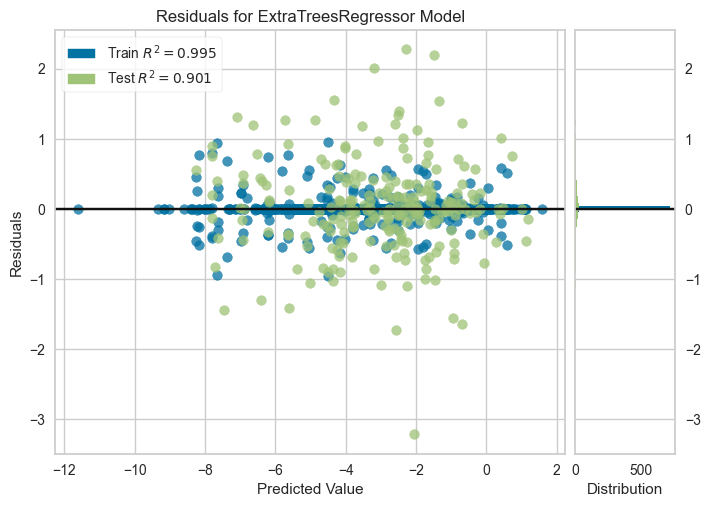

In [10]:
# Residuals plot 
plot_model(extra_trees, 'residuals')

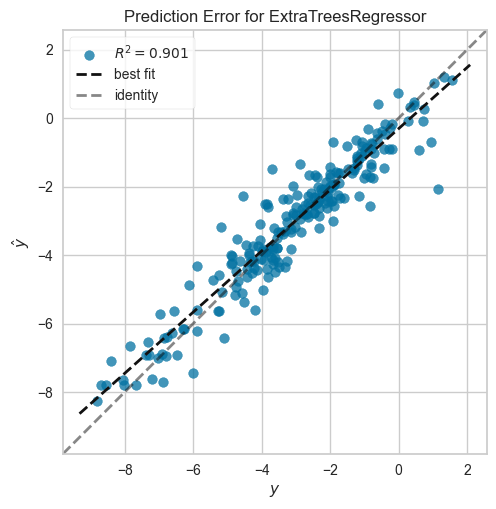

In [11]:
# Prediction error plot
# scatter plot of the predicted value and the actual value
plot_model(extra_trees, 'error')

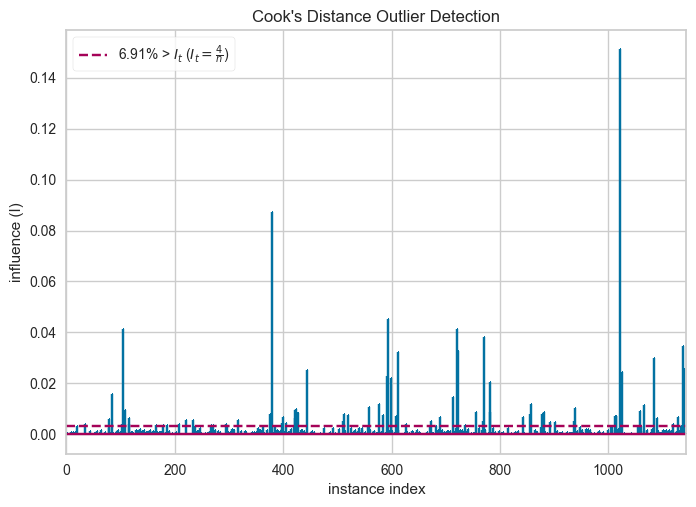

In [12]:
# Cooks distance plot for outlier ditection
plot_model(extra_trees, 'cooks')

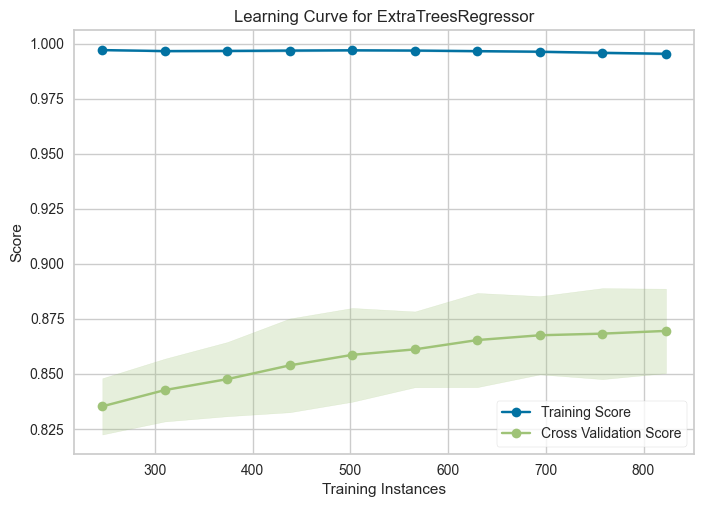

In [14]:
# Learning Curve
plot_model(extra_trees, 'learning')

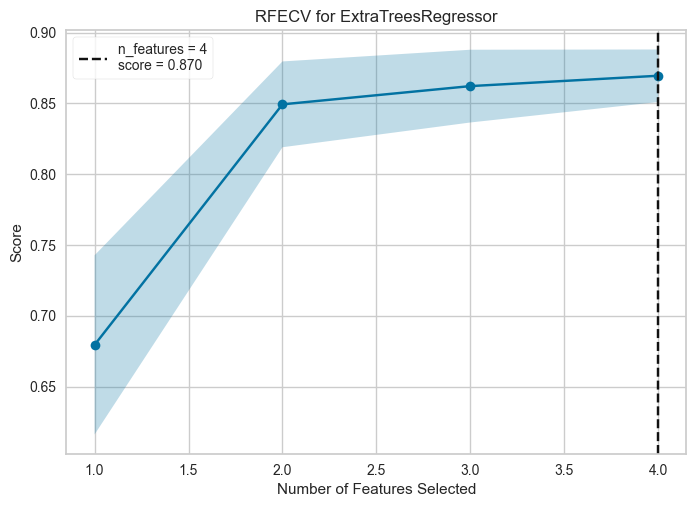

In [18]:
# Recursive feature selection
plot_model(extra_trees, 'rfe')

# This is showing that out of the 4 molecular descriptors, using only 2 features could provide an excess of 0.85 for the R^2. 
# And that the use of the remaining two descriptors, will slightly improve the performance of the prediction.

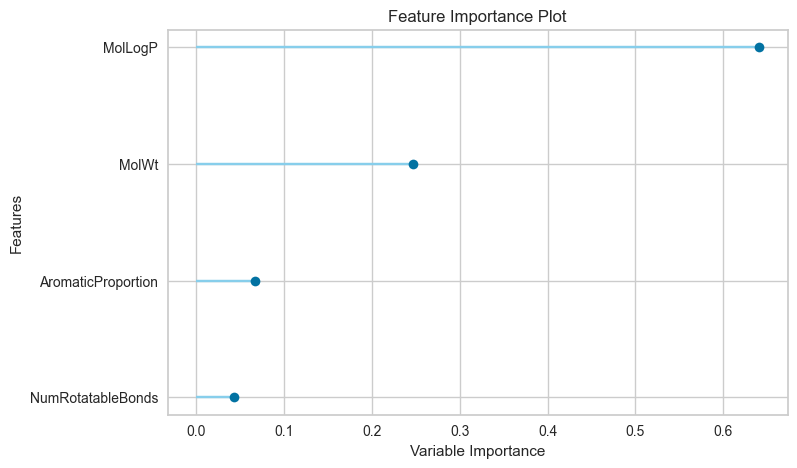

In [15]:
# Feature importance 
plot_model(extra_trees, 'feature')

### Model Hyperparameter
The hyperparameter of the learning model is displayed using the parameter argument inside the plot_model() function

In [16]:
plot_model(extra_trees, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


In [17]:
# Here, the hyperparameters of the tuned model is displayed 
plot_model(tuned_et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,11
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0005
min_impurity_split,None
min_samples_leaf,2


### Model Interpretation 
The interpret_model() function leverages the use of the SHAP library to produce stunning plots for depicting the (SHapley Additive exPlanations) values.

SHAP plots add interpretability to constructed models so that the contribution of each features to the prediction can be elucidated. 

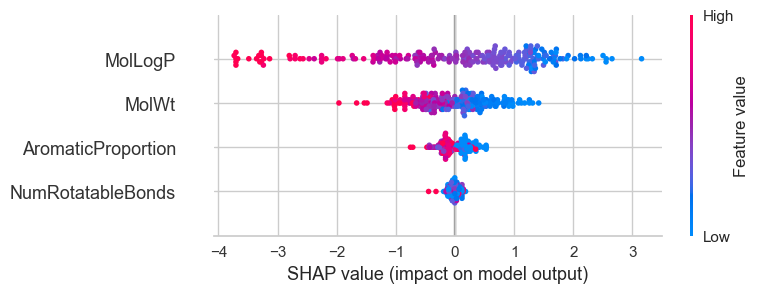

In [21]:
# Summary plot 
interpret_model(extra_trees)

# Here I am seeing the contribution of the features to the model performance. 

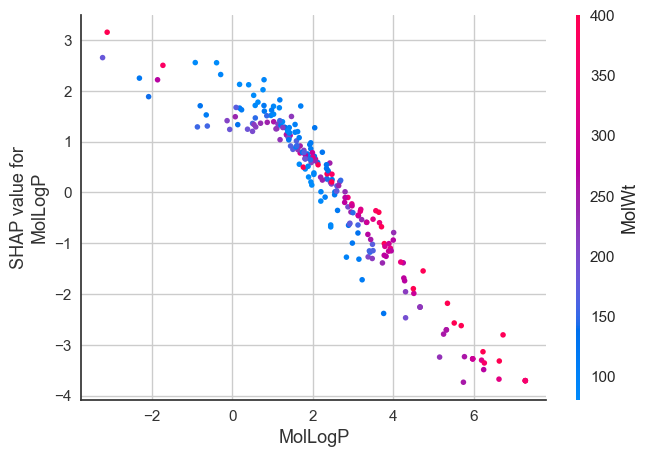

In [22]:
# Correlation plot 
interpret_model(extra_trees, plot='correlation')

### Reason Plot at Observation Level
The Reason Plot at Observation Level as called by PyCaret, is better known as the force plot. This plot essentially describes the push and pull effect that each individual feature has on the best value that eventually leads to the predicted output value. 

The base value can be thought of as the y-intercept

In [25]:
interpret_model(extra_trees, plot='reason', observation=10)

# The base value here is 0.43. I can see that the descriptors here are making the value higher. 
# I can see that my 4 features are pushing the base value higher. So its having a positive effect towards the output value prediction.

# For this particular model it is showing that all of the 4 descriptors are having a positive effect on the output value. 

### External Testing
I will now apply the trained model built with 80% subset to evaluate on the testing set (the 20% subset) that serves as the unseen data

In [27]:
pred_holdout = predict_model(extra_trees)

# I can see that the performance on the test set is 0.9015

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.4677,0.4485,0.6697,0.9015,0.1783,0.4193


In [28]:
pred_holdout.head()

# "Label"is the predicted value and "logS" is the experimental values.
# The predictions are pretty good 

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,Label
0,1.0831,224.259995,0.0,0.000,-2.982,-2.25511
1,1.9222,127.573997,0.0,0.750,-1.370,-1.59000
2,0.6361,16.042999,0.0,0.000,-0.900,-0.32340
3,1.4455,165.192001,2.0,0.500,-2.100,-2.61600
4,2.7989,232.205002,1.0,0.375,-3.430,-3.32000
